# Implementation of Nearest Neighbour Algorithm

This python notebook contains the implementations step of our nearest neighbour classifiers. The following sections are included:
* Data sheet pre-processing
    * classification datasheet preprocessing
    * numeric prediction datasheet preprocessing

* KNN classification
* KNN numeric prediction
* WNN classification
* WNN numeric prediction
* Data Generator
* Bayes Error
* Comparisons
* Summary of KNN and WNN classifiers result

New data set is also generated along with computation of Bayes error
* Data Generation
* Bayes Error Computation
* KNN validation
* WNN validation

In [6]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

In [7]:
from nnClass import knnClassifier, wnnClassifier
import data_processor as dp
import nnClass
from nnClass import knnClassifier, wnnClassifier

import generator as gn
import nnClass as nn
import error_func as ef

# Datasheet Pre-processing

## Classification: ionoshphere.data
* Check if the datasheet is unbalanced

In [8]:
# ======================= CLASSIFICATION using ionosphere.data ============
df = dp.load_datasheet("dataSheets/ionosphere.data")
x_df, y_df = dp.split_target(df)

# dataframe to numpy array
x_df = x_df.values
y_df = y_df.values

# Count labels to avoid unbalanced data sheet
dict_gb = {'g':0, 'b':0}

# Convert label from good and bad to 0 and 1
for i in range(len(y_df)):
    if y_df[i] == 'g':
        y_df[i] = 1
        dict_gb['g']+=1
    else:
        y_df[i] = 0
        dict_gb['b']+=1

print("no. good = {}".format(dict_gb['g']))
print("no. bad = {}".format(dict_gb['b']))
print()
print("no. features: = {}".format(x_df.shape[1]))
print("no. samples: = {}".format(x_df.shape[0]))


no. good = 225
no. bad = 126

no. features: = 34
no. samples: = 351


## Numeric Prediction: auto.data
* Trim data sheet by removing missing value and string value
* Apply normalisation

In [9]:
# ======================= NUMERIC PREDICTION using auto.data ============
# read data sheet and trim/normalisa data
df2 = dp.load_datasheet("dataSheets/auto.data", use_col = [0,1,9,10,11,12,13,16,18,20,21,22,23,24,25])
df2 = dp.trim_data(df2)
x_df2, y_df2 = dp.split_target(df2)
x_df2 = dp.normalise_data(x_df2)

# dataframe to numpy array
x_df2 = x_df2.values
y_df2 = y_df2.values
print()
print("no. features: = {}".format(x_df2.shape[1]))
print("no. samples: = {}".format(x_df2.shape[0]))


no. features: = 14
no. samples: = 160


# Classification using KNN

... Prediction: k = 1
... Prediction: k = 3
... Prediction: k = 5
... Prediction: k = 7
... Prediction: k = 9
... Prediction: k = 11
... Prediction: k = 13
... Prediction: k = 15
... Prediction: k = 17
... Prediction: k = 19
... Prediction: k = 21
... Prediction: k = 23
... Prediction: k = 25
... Prediction: k = 27
... Prediction: k = 29
... Prediction: k = 31
... Prediction: k = 33

KNN classification: Minimum error is 0.1339031339031339


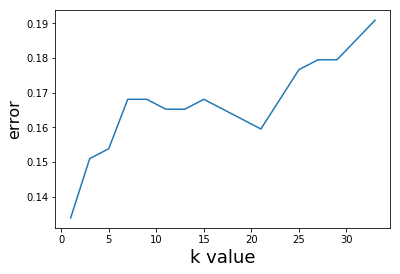

In [10]:

# ============= leave one out cross validation ==========
all_errors =[]
# For classification, only odd value of k is allowed
k_range1 = list(range(1,35,2))

# for each k
for k in k_range1:
    print("... Prediction: k = {}".format(k))
    pred_list = []
    # Do leave one out validation
    for i in range(len(x_df)):
        # Split dataset into trainset and validation entry
        x_trainset = np.delete(x_df, i,0)
        x_validate = x_df[i,:]
        y_trainset = np.delete(y_df,i)
        y_validate = y_df[i]

        # classification using 'vote' (ONLY FOR classification DATASHEET)
        kc = knnClassifier(x_trainset, y_trainset,k,pred_mode = 'vote')
        res = kc.predict([x_validate])[0]
    
        # Append result to prediction list
        pred_list.append(res)

    # Get error for this k value
    all_errors.append(ef.error_discrete(pred_list,y_df))

print("\nKNN classification: Minimum error is {}".format(np.min(all_errors)))

# Plot k_range1 versus errors
plt.plot(k_range1,all_errors)
plt.xlabel('k value', fontsize=18)
plt.ylabel('error', fontsize=16)
plt.show()

# Numeric Prediction using KNN

... Prediction: k = 1
... Prediction: k = 2
... Prediction: k = 3
... Prediction: k = 4
... Prediction: k = 5
... Prediction: k = 6
... Prediction: k = 7
... Prediction: k = 8
... Prediction: k = 9
... Prediction: k = 10
... Prediction: k = 11
... Prediction: k = 12
... Prediction: k = 13
... Prediction: k = 14
... Prediction: k = 15
... Prediction: k = 16
... Prediction: k = 17
... Prediction: k = 18
... Prediction: k = 19
... Prediction: k = 20
... Prediction: k = 21
... Prediction: k = 22
... Prediction: k = 23
... Prediction: k = 24
... Prediction: k = 25
... Prediction: k = 26
... Prediction: k = 27
... Prediction: k = 28
... Prediction: k = 29
... Prediction: k = 30
... Prediction: k = 31
... Prediction: k = 32
... Prediction: k = 33
... Prediction: k = 34

KNN numeric prediction: Minimum error is 0.12175479202696357


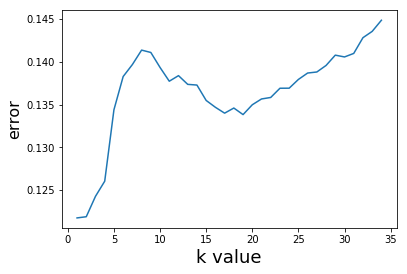

In [11]:

# =========== leave one out cross validation ===========
# for each element in x
all_errors2 =[]
k_range2 = list(range(1,35))
for k in k_range2:
    print("... Prediction: k = {}".format(k))
    err_list = []
    for i in range(len(x_df2)):

        # isolate the entry of current index
        x_trainset = np.delete(x_df2, i,0)
        x_validate = x_df2[i,:]
        y_trainset = np.delete(y_df2,i)
        y_validate = y_df2[i]

        # classification using 'avg' (ONLY FOR 'AUTO' DATASHEET)
        kc2 = knnClassifier(x_trainset, y_trainset,k,pred_mode = 'avg')
        res = kc2.predict([x_validate])[0]

        # Calculate percentage error and append to list
        err_list.append(ef.error_percentage_step(res,y_validate))

    # Get mean error 
    all_errors2.append(np.mean(err_list))
    
print("\nKNN numeric prediction: Minimum error is {}".format(np.min(all_errors2)))
plt.xlabel('k value', fontsize=18)
plt.ylabel('error', fontsize=16)
plt.plot(k_range2,all_errors2)
plt.show()

# Classification using WNN

... Prediction: k = 1
... Prediction: k = 3
... Prediction: k = 5
... Prediction: k = 7
... Prediction: k = 9
... Prediction: k = 11
... Prediction: k = 13
... Prediction: k = 15
... Prediction: k = 17
... Prediction: k = 19
... Prediction: k = 21
... Prediction: k = 23
... Prediction: k = 25
... Prediction: k = 27
... Prediction: k = 29
... Prediction: k = 31
... Prediction: k = 33

WNN classification: Minimum error is 0.1339031339031339


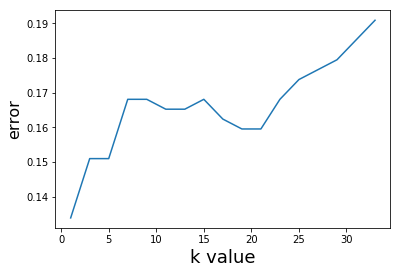

In [12]:
all_errors3 =[]
k_range3 = list(range(1,35,2))
for k in k_range3:
    print("... Prediction: k = {}".format(k))
    pred_list = []
    
    for i in range(len(x_df)):

        # isolate the entry of current index
        x_trainset = np.delete(x_df, i,0)
        x_validate = x_df[i,:]
        y_trainset = np.delete(y_df,i)
        y_validate = y_df[i]

        # classification using 'vote' (ONLY FOR classification DATASHEET)
        kc = wnnClassifier(x_trainset, y_trainset,k,pred_mode = 'vote')
        res = kc.predict([x_validate])[0]

        # Append result to prediction list
        pred_list.append(res)
    all_errors3.append(ef.error_discrete(pred_list,y_df))
    
print("\nWNN classification: Minimum error is {}".format(np.min(all_errors3)))
plt.xlabel('k value', fontsize=18)
plt.ylabel('error', fontsize=16)
plt.plot(k_range3,all_errors3)
plt.show()

# Numeric Prediction using WNN

... Prediction: k = 1
... Prediction: k = 2
... Prediction: k = 3
... Prediction: k = 4
... Prediction: k = 5
... Prediction: k = 6
... Prediction: k = 7
... Prediction: k = 8
... Prediction: k = 9
... Prediction: k = 10
... Prediction: k = 11
... Prediction: k = 12
... Prediction: k = 13
... Prediction: k = 14
... Prediction: k = 15
... Prediction: k = 16
... Prediction: k = 17
... Prediction: k = 18
... Prediction: k = 19
... Prediction: k = 20
... Prediction: k = 21
... Prediction: k = 22
... Prediction: k = 23
... Prediction: k = 24
... Prediction: k = 25
... Prediction: k = 26
... Prediction: k = 27
... Prediction: k = 28
... Prediction: k = 29
... Prediction: k = 30
... Prediction: k = 31
... Prediction: k = 32
... Prediction: k = 33
... Prediction: k = 34

WNN numeric prediction: Minimum error is 0.1164255222599128


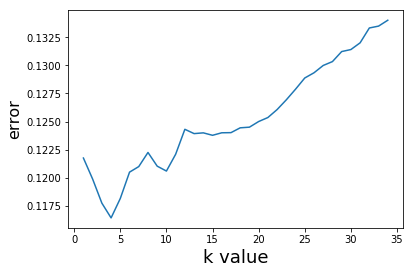

In [13]:
all_errors4 =[]
k_range4 = list(range(1,35))
for k in k_range4:
    print("... Prediction: k = {}".format(k))
    err_list = []
    for i in range(len(x_df2)):
        x_trainset = np.delete(x_df2, i,0)
        x_validate = x_df2[i,:]
        y_trainset = np.delete(y_df2,i)
        y_validate = y_df2[i]
        kc2 = wnnClassifier(x_trainset, y_trainset,k,pred_mode = 'avg')
        res = kc2.predict([x_validate])
        err_list.append(ef.error_percentage_step(res[0],y_validate))

    all_errors4.append(np.mean(err_list))

print("\nWNN numeric prediction: Minimum error is {}".format(np.min(all_errors4)))
plt.xlabel('k value', fontsize=18)
plt.ylabel('error', fontsize=16)
plt.plot(k_range4,all_errors4)
plt.show() 

# Summary 

=================== Error summary ===================

      |    Classification      |     Numeric Prediction|
 -------------------------------------------------------|
 KNN  |        0.1339           |        0.1218         |
 WNN  |        0.1339           |        0.1164         |


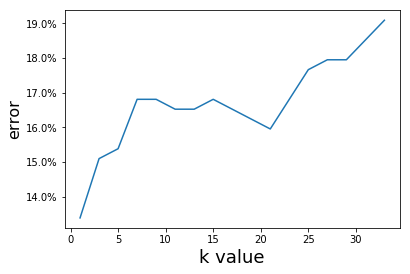

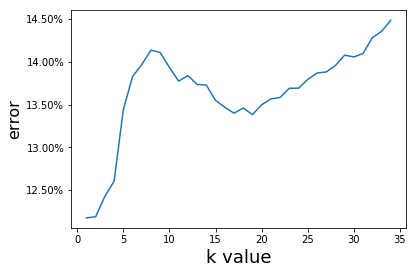

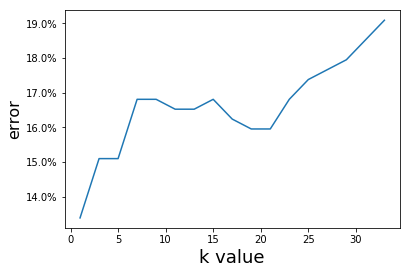

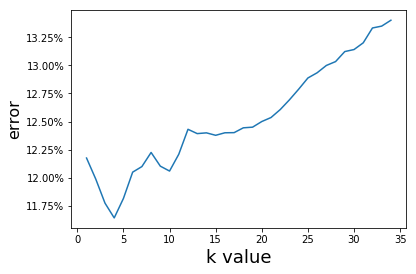

In [14]:
from matplotlib.ticker import PercentFormatter

print("=================== Error summary ===================\n")
print("      |    Classification      |     Numeric Prediction|")
print(" -------------------------------------------------------|")
print(" KNN  |        {0:.4f}           |        {1:.4f}         |".format(np.min(all_errors), np.min(all_errors2)))
print(" WNN  |        {0:.4f}           |        {1:.4f}         |".format(np.min(all_errors3),np.min(all_errors4)))

allerr = [all_errors, all_errors2,all_errors3, all_errors4]
plt_range = [k_range1, k_range2, k_range3, k_range4]
names = ['knn_classification','knn_prediction','wnn_classification','wnn_prediction']
all_err_perc = []

# Map error into percentage
for i in range(len(allerr)):
    l = [x*100 for x in allerr[i]]
    all_err_perc.append(l)

# for each error list, plot error vs k value
for i in range(len(allerr)):
    fig,ax = plt.subplots()
    plt.xlabel('k value', fontsize=18)
    ax.yaxis.set_major_formatter(PercentFormatter())
    plt.ylabel('error', fontsize=16)
    plt.plot(plt_range[i],all_err_perc[i])
    
    # Comment out save fig required
    # fig.savefig(names[i] + '.png',bbox_inches='tight', dpi = 150)
    
    plt.show()

# Data Generation and Bayes Error

## Generate Data
Generate a dataset with 350 samples and 34 features and with the target function\
**p( y = 1 | x1 > 0.40 ) = 0.90**

In [15]:
# Generate 350 samples with 34 feature
samples = 350
features = 34
generator = gn.data_generator(samples, features, n_informative=2, random_state=4)
print
# Target function = p( 1 | x1 > 0.40 ) = 0.90
generator.add_rule(1,1,0.4,1,0.9)
X,y = generator.generate_data()
print(f"Generated {samples} samples with {features} features and target function: ", end = '')
print(generator.get_rules()[0])
print(X)
print(y)

Generated 350 samples with 34 features and target function: p( y = 1 | x1 > 0.40 ) = 0.90
[[0.96702984 0.36366065 0.97268436 ... 0.93757158 0.52169612 0.10819338]
 [0.15822341 0.74100346 0.52440408 ... 0.86101431 0.59568812 0.08466161]
 [0.59726661 0.70399664 0.73259345 ... 0.43676629 0.26092216 0.41247221]
 ...
 [0.78644196 0.24044222 0.77829145 ... 0.26768598 0.56534766 0.73050654]
 [0.61634013 0.38047897 0.50511191 ... 0.88704884 0.39459258 0.61250109]
 [0.34557615 0.33979455 0.17472848 ... 0.42051929 0.99555619 0.86552232]]
[0 1 1 1 1 1 1 0 0 0 1 0 1 0 1 0 0 1 0 1 1 0 0 1 1 1 1 0 1 1 1 1 0 0 0 1 0
 0 1 0 1 0 0 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 1 1
 1 0 0 1 1 0 1 0 1 1 1 1 0 1 0 1 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1
 0 0 0 0 0 1 1 0 0 0 0 1 0 0 1 0 1 1 0 0 1 1 1 1 0 0 1 1 0 1 1 0 1 0 0 1 1
 1 1 1 0 1 0 0 1 1 0 0 0 0 1 1 1 1 0 1 0 0 1 0 1 1 1 1 0 0 1 1 1 1 0 1 0 1
 1 0 1 0 1 0 1 0 1 0 1 1 1 0 0 0 1 1 0 1 0 0 1 0 0 0 0 1 1 0 1 1 1 0 0 0 0
 0 1 1 0 1 0 0 1

## Bayes Error
Run bayes error on our generated data

In [20]:
import bayes_error as bys

# Run bayes error on our generated data
ob = bys.bayes_classification(X,y)
bys_error = ob.bayes_error()
print(f"Bayes Error is {bys_error}")

Bayes Error is 0.025714285714285714


### kNN 
Run and plot kNN on our generated data

kNN classification with Eucliean Distance:
... Prediction: k = 1
... Prediction: k = 2
... Prediction: k = 3
... Prediction: k = 4
... Prediction: k = 5
... Prediction: k = 6
... Prediction: k = 7
... Prediction: k = 8
... Prediction: k = 9
... Prediction: k = 10
... Prediction: k = 11
... Prediction: k = 12
... Prediction: k = 13
... Prediction: k = 14
... Prediction: k = 15
... Prediction: k = 16
... Prediction: k = 17
... Prediction: k = 18
... Prediction: k = 19
... Prediction: k = 20
... Prediction: k = 21
... Prediction: k = 22
... Prediction: k = 23
... Prediction: k = 24
... Prediction: k = 25
... Prediction: k = 26
... Prediction: k = 27
... Prediction: k = 28
... Prediction: k = 29
... Prediction: k = 30
... Prediction: k = 31
... Prediction: k = 32
... Prediction: k = 33
... Prediction: k = 34
... Prediction: k = 35
... Prediction: k = 36
... Prediction: k = 37
... Prediction: k = 38
... Prediction: k = 39
... Prediction: k = 40
... Prediction: k = 41
... Prediction: k = 42


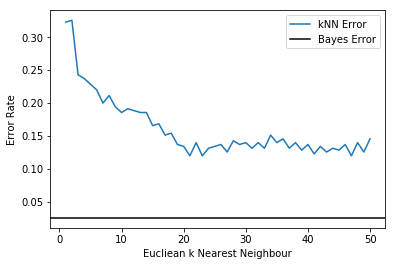

Minimum error is 0.12 in k = 21



In [21]:
import matplotlib.pyplot as plt
import error_func as ef
import nnClass as nn

print("kNN classification with Eucliean Distance:")
ks = []
error_rates = []
for j in range(1,51):
    k = j
    pred_list = []
    ks.append(k)
    print("... Prediction: k = {}".format(k))
    for i in range(len(X)):
        x_trainset = np.delete(X, i,0)
        x_validate = X[i,:]
        y_trainset = np.delete(y,i)
        y_validate = y[i]

        kc = knnClassifier(x_trainset, y_trainset,k,pred_mode = 'vote')
        res = kc.predict([x_validate])[0]
        pred_list.append(res)

    error_rates.append(ef.error_discrete(pred_list,y))
    
plt.plot(ks,error_rates)
plt.axhline(y=bys_error, color='k')
plt.ylabel("Error Rate")
plt.xlabel("Eucliean k Nearest Neighbour")
plt.legend(["kNN Error","Bayes Error"])

plt.show()
print(f"Minimum error is {min(error_rates)} in k = {error_rates.index(min(error_rates))+1}\n")

kNN classification with Manhattan Distance:
... Prediction: k = 1
... Prediction: k = 2
... Prediction: k = 3
... Prediction: k = 4
... Prediction: k = 5
... Prediction: k = 6
... Prediction: k = 7
... Prediction: k = 8
... Prediction: k = 9
... Prediction: k = 10
... Prediction: k = 11
... Prediction: k = 12
... Prediction: k = 13
... Prediction: k = 14
... Prediction: k = 15
... Prediction: k = 16
... Prediction: k = 17
... Prediction: k = 18
... Prediction: k = 19
... Prediction: k = 20
... Prediction: k = 21
... Prediction: k = 22
... Prediction: k = 23
... Prediction: k = 24
... Prediction: k = 25
... Prediction: k = 26
... Prediction: k = 27
... Prediction: k = 28
... Prediction: k = 29
... Prediction: k = 30
... Prediction: k = 31
... Prediction: k = 32
... Prediction: k = 33
... Prediction: k = 34
... Prediction: k = 35
... Prediction: k = 36
... Prediction: k = 37
... Prediction: k = 38
... Prediction: k = 39
... Prediction: k = 40
... Prediction: k = 41
... Prediction: k = 42

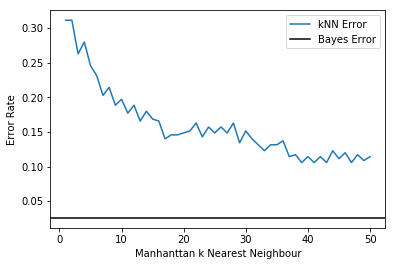

Minimum error is 0.10571428571428572 in k = 39


In [22]:
print("kNN classification with Manhattan Distance:")
ks = []
error_rates = []
for j in range(1,51):
    k = j
    pred_list = []
    ks.append(k)
    print("... Prediction: k = {}".format(k))
    for i in range(len(X)):
        x_trainset = np.delete(X, i,0)
        x_validate = X[i,:]
        y_trainset = np.delete(y,i)
        y_validate = y[i]

        kc = knnClassifier(x_trainset, y_trainset,k,dis_mode='m',pred_mode = 'vote')
        res = kc.predict([x_validate])[0]
        pred_list.append(res)

    error_rates.append(ef.error_discrete(pred_list,y))
    
plt.plot(ks,error_rates)
plt.axhline(y=bys_error, color='k')
plt.ylabel("Error Rate")
plt.xlabel("Manhanttan k Nearest Neighbour")
plt.legend(["kNN Error","Bayes Error"])

plt.show()
print(f"Minimum error is {min(error_rates)} in k = {error_rates.index(min(error_rates))+1}")

### WNN
Run and plot WNN on our generated data

WNN Classification with Eucliean Distance:
... Prediction: k = 1
... Prediction: k = 2
... Prediction: k = 3
... Prediction: k = 4
... Prediction: k = 5
... Prediction: k = 6
... Prediction: k = 7
... Prediction: k = 8
... Prediction: k = 9
... Prediction: k = 10
... Prediction: k = 11
... Prediction: k = 12
... Prediction: k = 13
... Prediction: k = 14
... Prediction: k = 15
... Prediction: k = 16
... Prediction: k = 17
... Prediction: k = 18
... Prediction: k = 19
... Prediction: k = 20
... Prediction: k = 21
... Prediction: k = 22
... Prediction: k = 23
... Prediction: k = 24
... Prediction: k = 25
... Prediction: k = 26
... Prediction: k = 27
... Prediction: k = 28
... Prediction: k = 29
... Prediction: k = 30
... Prediction: k = 31
... Prediction: k = 32
... Prediction: k = 33
... Prediction: k = 34
... Prediction: k = 35
... Prediction: k = 36
... Prediction: k = 37
... Prediction: k = 38
... Prediction: k = 39
... Prediction: k = 40
... Prediction: k = 41
... Prediction: k = 42


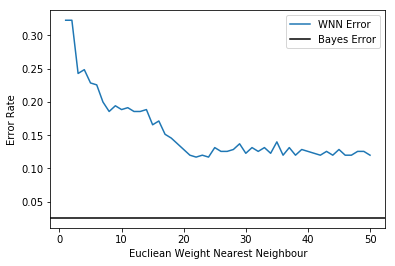

Minimum error is 0.11714285714285715 in k = 22



In [23]:
import matplotlib.pyplot as plt
import error_func as ef
import nnClass as nn

print("WNN Classification with Eucliean Distance:")
ks = []
error_rates = []
for j in range(1,51):
    k = j
    pred_list = []
    ks.append(k)
    print("... Prediction: k = {}".format(k))
    for i in range(len(X)):
        x_trainset = np.delete(X, i,0)
        x_validate = X[i,:]
        y_trainset = np.delete(y,i)
        y_validate = y[i]

        kc = wnnClassifier(x_trainset, y_trainset,k,pred_mode = 'vote')
        res = kc.predict([x_validate])[0]
        pred_list.append(res)

    error_rates.append(ef.error_discrete(pred_list,y))
    
plt.plot(ks,error_rates)
plt.axhline(y=bys_error, color='k')
plt.ylabel("Error Rate")
plt.xlabel("Eucliean Weight Nearest Neighbour")
plt.legend(["WNN Error","Bayes Error"])

plt.show()
print(f"Minimum error is {min(error_rates)} in k = {error_rates.index(min(error_rates))+1}\n")

WNN Classification with Manhattan Distance:
... Prediction: k = 1
... Prediction: k = 2
... Prediction: k = 3
... Prediction: k = 4
... Prediction: k = 5
... Prediction: k = 6
... Prediction: k = 7
... Prediction: k = 8
... Prediction: k = 9
... Prediction: k = 10
... Prediction: k = 11
... Prediction: k = 12
... Prediction: k = 13
... Prediction: k = 14
... Prediction: k = 15
... Prediction: k = 16
... Prediction: k = 17
... Prediction: k = 18
... Prediction: k = 19
... Prediction: k = 20
... Prediction: k = 21
... Prediction: k = 22
... Prediction: k = 23
... Prediction: k = 24
... Prediction: k = 25
... Prediction: k = 26
... Prediction: k = 27
... Prediction: k = 28
... Prediction: k = 29
... Prediction: k = 30
... Prediction: k = 31
... Prediction: k = 32
... Prediction: k = 33
... Prediction: k = 34
... Prediction: k = 35
... Prediction: k = 36
... Prediction: k = 37
... Prediction: k = 38
... Prediction: k = 39
... Prediction: k = 40
... Prediction: k = 41
... Prediction: k = 42

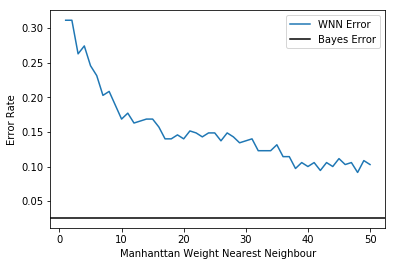

Minimum error is 0.09142857142857143 in k = 48


In [24]:
print("WNN Classification with Manhattan Distance:")
ks = []
error_rates = []
for j in range(1,51):
    k = j
    pred_list = []
    ks.append(k)
    print("... Prediction: k = {}".format(k))
    for i in range(len(X)):
        x_trainset = np.delete(X, i,0)
        x_validate = X[i,:]
        y_trainset = np.delete(y,i)
        y_validate = y[i]

        kc = wnnClassifier(x_trainset, y_trainset,k,dis_mode='m',pred_mode = 'vote')
        res = kc.predict([x_validate])[0]
        pred_list.append(res)

    error_rates.append(ef.error_discrete(pred_list,y))
    
plt.plot(ks,error_rates)
plt.axhline(y=bys_error, color='k')
plt.ylabel("Error Rate")
plt.xlabel("Manhanttan Weight Nearest Neighbour")
plt.legend(["WNN Error","Bayes Error"])

plt.show()
print(f"Minimum error is {min(error_rates)} in k = {error_rates.index(min(error_rates))+1}")